<h1> Showcasing the SEIR-T model and the EpiCURB framework

In [ ]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')

<h2> Working examples

In [19]:
from ct_simulator import run_tracing
kwargs = {
    'netsize':200, 'nettype':'barabasi', 'k':10, 'model':'covid', 'first_inf': 30,
    'dual':2, 'uptake':.3, 'overlap':.7, 'taut':.1, 'taur':.1, 'animate':0,
}
run_tracing.run_api(**kwargs)


Experiment date: 2023-11-27--14-30/

Running simulation with parameters:
netsize = 200, k = 10, dual = 2, model = covid
overlap = 0.7, uptake = 0.3, maintain_overlap = False
overlap_two = 0.5, uptake_two = 1.0, maintain_overlap_two = True
taut = 0.1, taur = 0.1, noncomp = 0.0, noncomp_dependtime = True

                                                                                                                       
Running iteration 0, with eps = 0.1:
---> Result: 81 total infected over time. %healthy = 0.595                                                             
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.88it/s]


In [20]:
from ct_simulator import run_tracing
import networkx as nx
G = nx.fast_gnp_random_graph(200, p=.2, seed=5)
kwargs = {
    'nettype': G, 'model':'covid', 'first_inf': 30,
    'dual':2, 'uptake':.5, 'overlap':.7, 'taut':.1, 'taur':.1, 'animate':0,
}
run_tracing.run_api(**kwargs)


Experiment date: 2023-11-27--14-31/

Running simulation with parameters:
netsize = NotYetDefined, k = NotYetDefined, dual = 2, model = covid
overlap = 0.7, uptake = 0.5, maintain_overlap = False
overlap_two = 0.5, uptake_two = 1.0, maintain_overlap_two = True
taut = 0.1, taur = 0.1, noncomp = 0.0, noncomp_dependtime = True

                                                                                                                       
Running iteration 0, with eps = 0.1:
---> Result: 125 total infected over time. %healthy = 0.375                                                            
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.00it/s]


In [22]:
from ct_simulator import run_tracing
nettype = {
    'nid': range(10),
    '0': (
        [(1,3), (1,2), (1,5), (1,4), (2,3), (5,3)], 
        [(1,2), (2,3)], 
        [(1,5),(2,3)], [(1,3,7), (1,4,2)],
    ),
    '1': (
        [(0,1), (1,7), (0,5), (1,4), (2,5)], 
        [(5,2), (1,4)], 
        [(0,3), (2,5), (0,1)]
    ), 
    '2': ([(0,5), (1,4), (1,2)],[(4,1), (1,2)], [(1,2), (1,4)]),       
}
kwargs = {
    'nettype':nettype, 'model':'covid', 'dual':1, 'first_inf': 4, 
    'update_after':1, 'taut':.1, 'taur':.1, 'animate':0,
}
run_tracing.run_api(**kwargs)


Experiment date: 2023-11-27--14-31/

Running simulation with parameters:
netsize = 10, k = 1.2, dual = 1, model = covid
overlap = 0.8, uptake = 1.0, maintain_overlap = False
taut = 0.1, taur = 0.1, noncomp = 0.0, noncomp_dependtime = True

                                                                                                                       
Running iteration 0, with eps = 0.1:
---> Result: 5 total infected over time. %healthy = 0.5                                                                
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.82it/s]


<h2> Visualize spread with animations

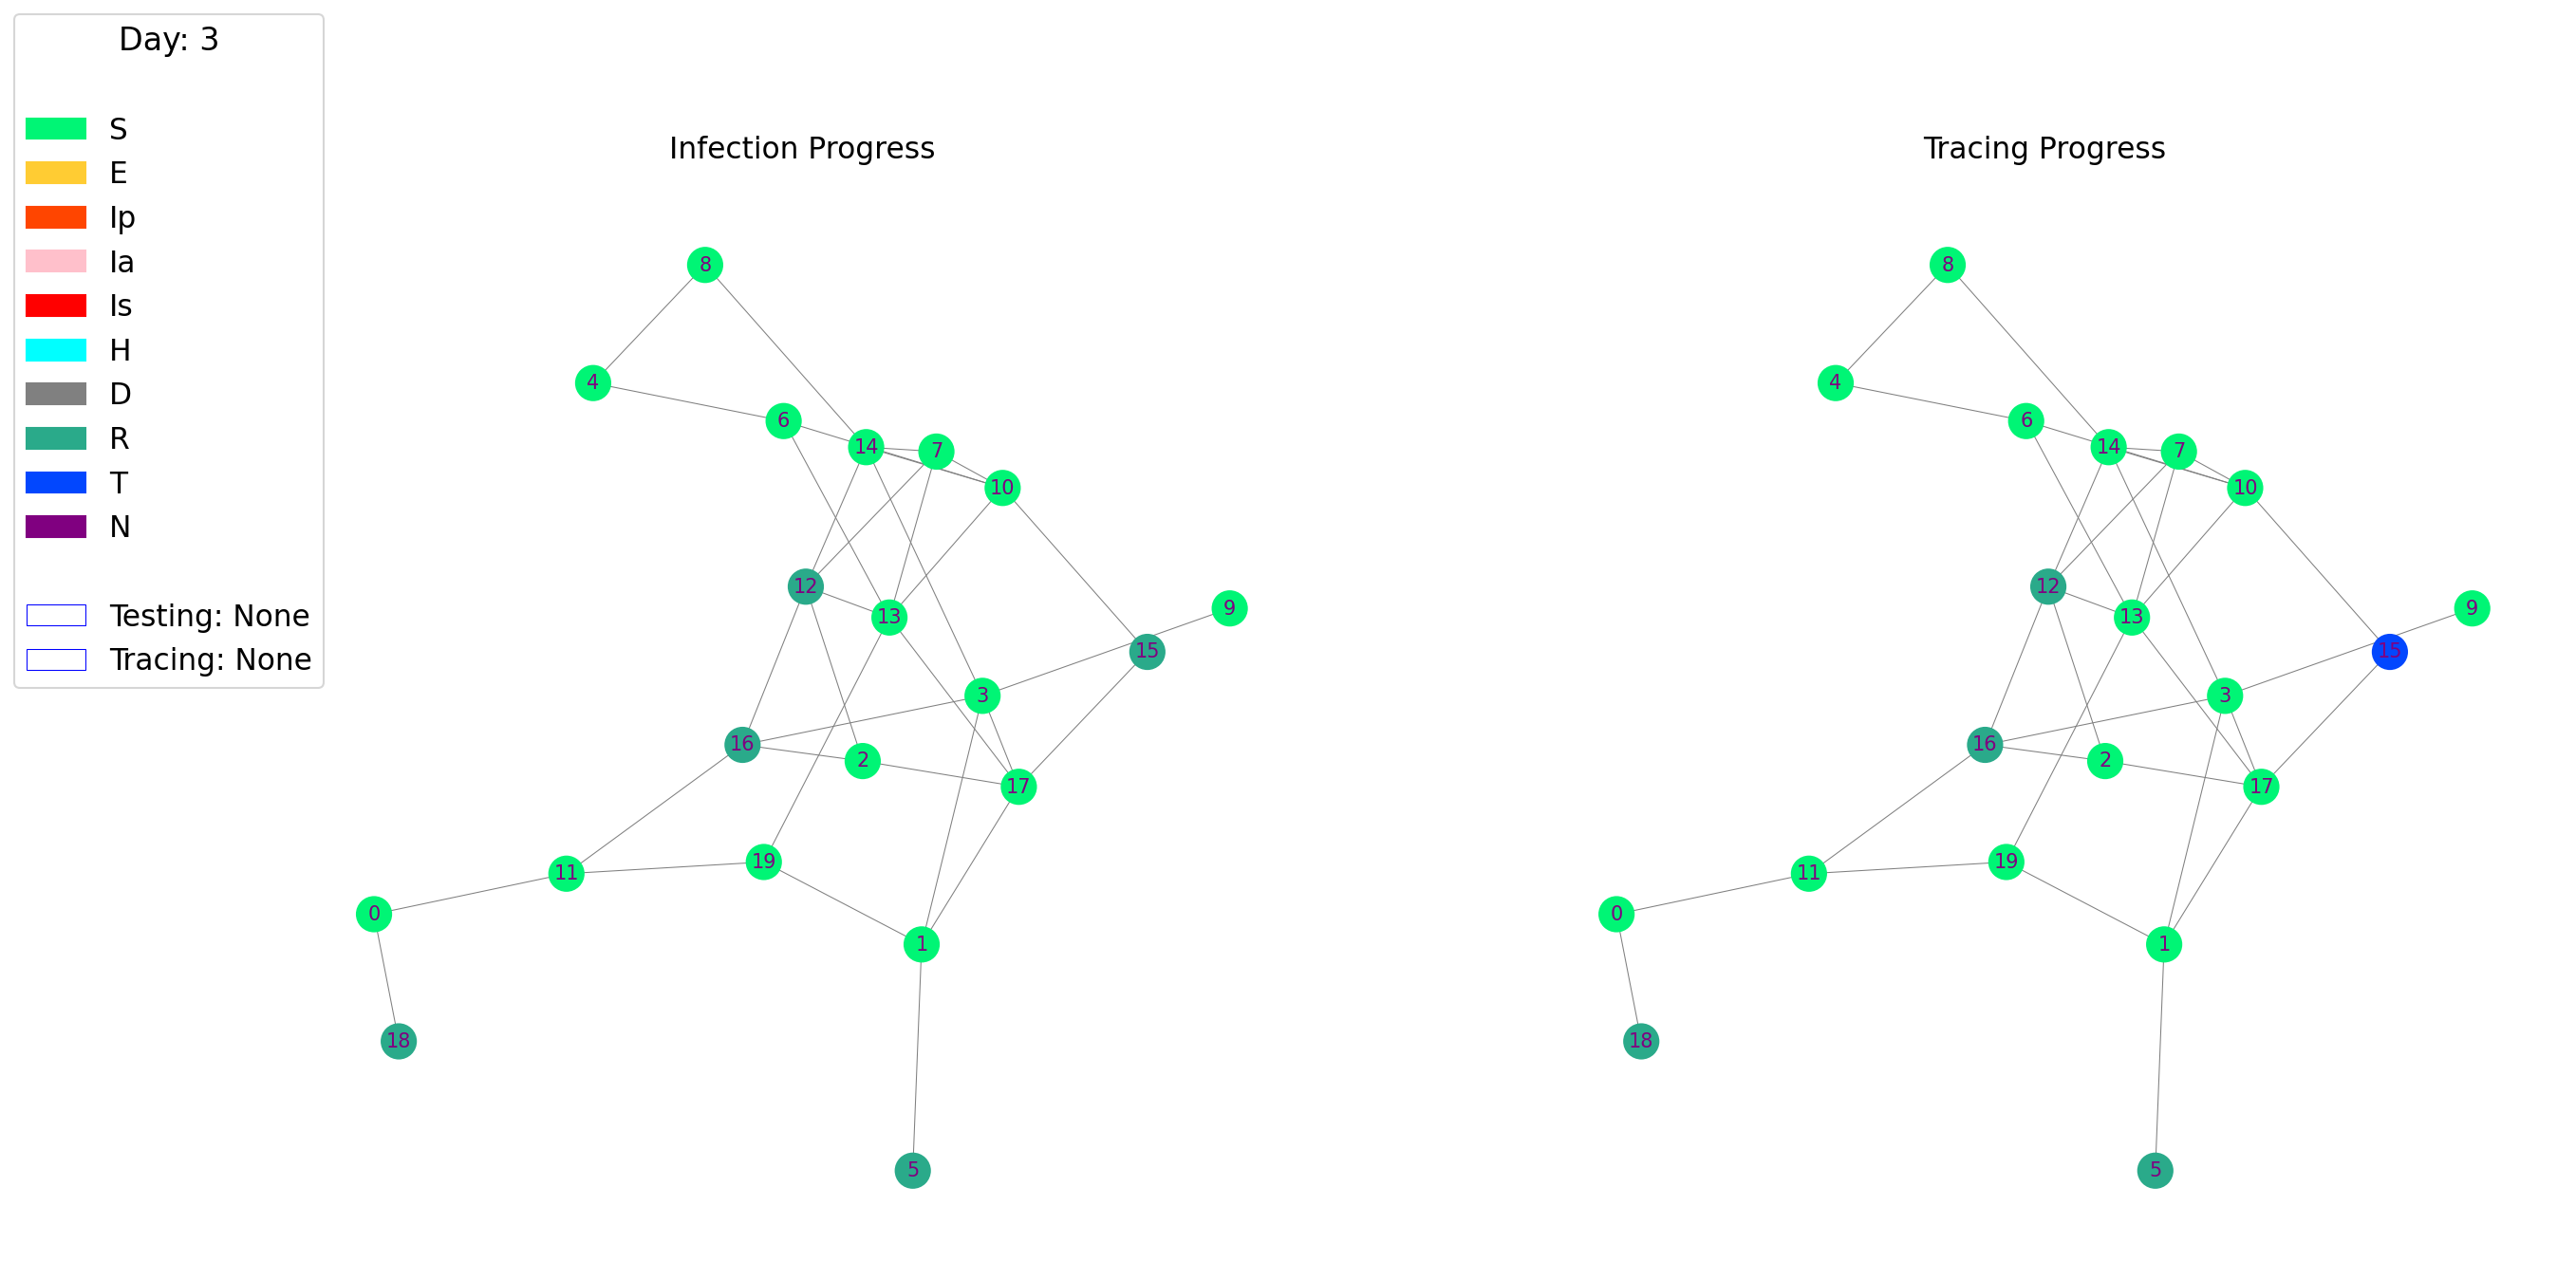

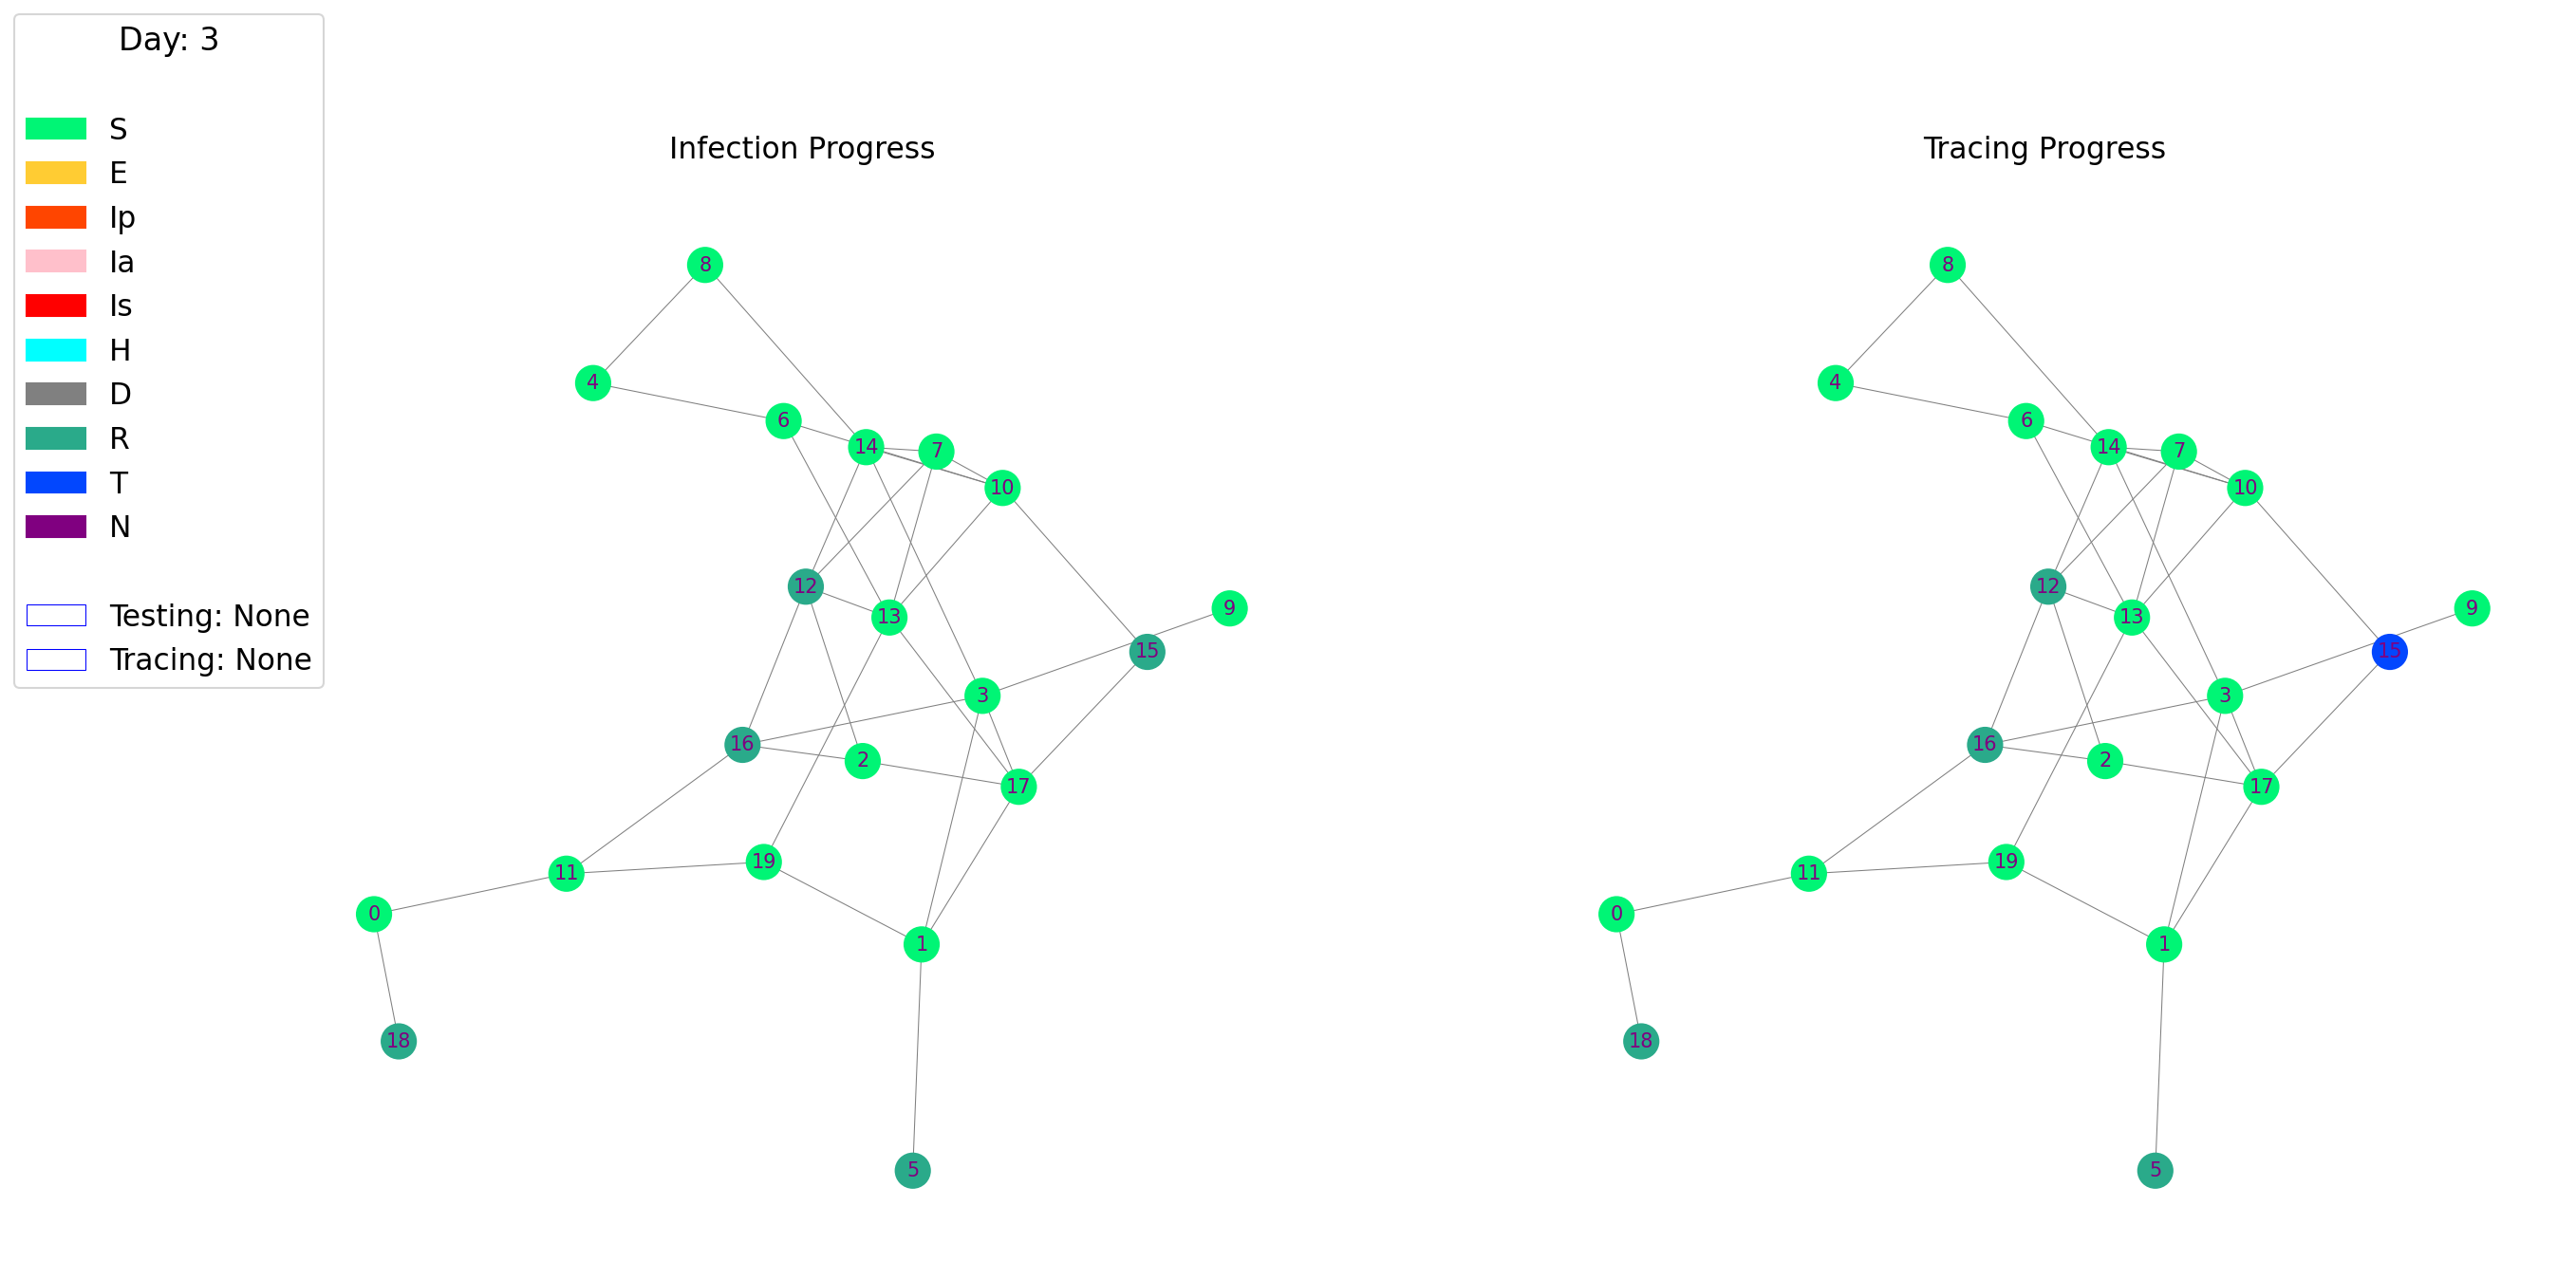

In [4]:
from ct_simulator import run_tracing
import networkx as nx
G = nx.fast_gnp_random_graph(20, p=.2, seed=5)
kwargs = {
    'nettype': G, 'model':'covid', 'first_inf': 5,
    'dual':0, 'uptake':.8, 'overlap':.7, 'taut':.1, 'taur':.1, 'animate':1,
    'draw_config':{'plotter': 'default', 'bgcolor': 'white', 'layout': 'spring',
                   'font_size': 10, 'font_color': 'purple', 'title_fontsize': 15,
                   'edge_color': 'gray', 'edge_width': .5, 'legend': 1, 'margins': 0}
}
run_tracing.run_api(**kwargs)

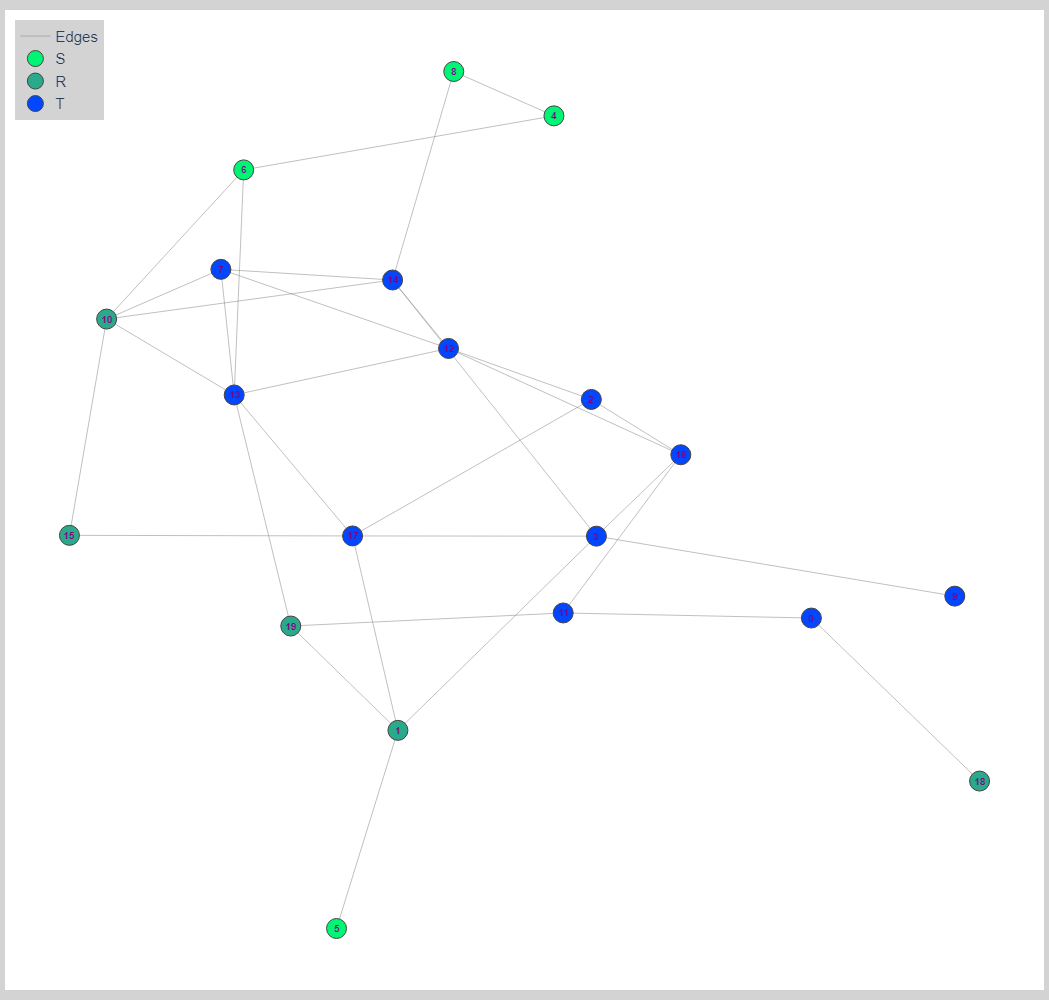

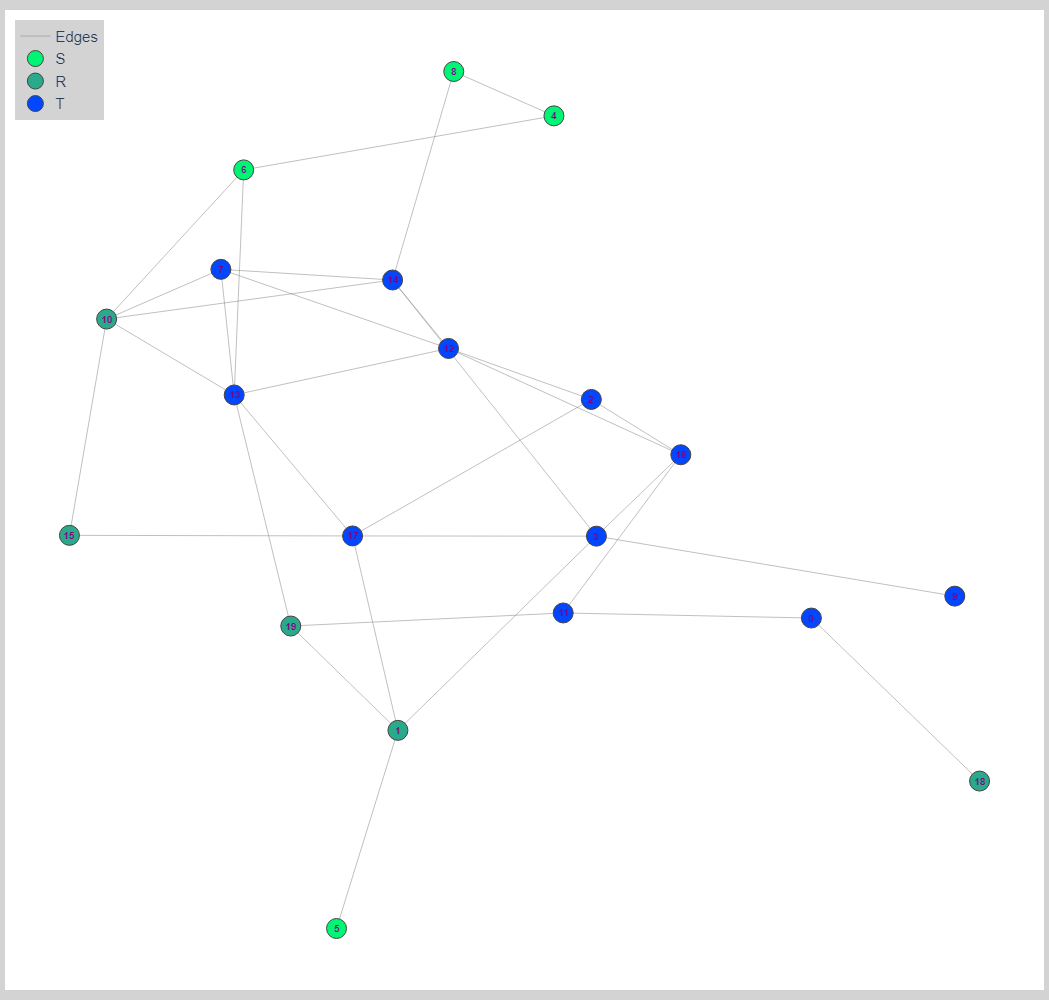

<Figure size 640x480 with 0 Axes>

In [6]:
from ct_simulator import run_tracing
import networkx as nx
G = nx.fast_gnp_random_graph(20, p=.2, seed=5)
kwargs = {
    'nettype': G, 'model':'covid', 'first_inf': 5,
    'dual':0, 'uptake':.8, 'overlap':.7, 'taut':.1, 'taur':.1, 'animate':1,
    'draw_config':{'plotter': 'plotly', 'bgcolor': 'white', 'layout': 'spring',
                   'font_size': 10, 'font_color': 'purple', 'title_fontsize': 15,
                   'edge_color': 'gray', 'edge_width': .5, 'legend': 1, 'margins': 0}
}
run_tracing.run_api(**kwargs)

<h2> Using control agents

<h3> Centrality agent

In [4]:
from ct_simulator import run_tracing

ag = dict(
    typ='centrality',
    measure='degree',
    edge_forget_after=0,
    edge_replace_prev=1,
    n_test=2,
    n_trace=0,
    n_vax=0,
    tester=1,
    tracer=0,
    vaxer=0,
    keep_pos_until=6,
    keep_neg_until=3,
    recollection=1,
    seed=12,
    ckp=0,
    ckp_ep=1,
    tb_log=1,
)
sim_dict = dict(agent=ag, control_after=5, control_after_inf=.05, control_initial_known=-.25, control_makeup_days=2,
                first_inf=5, presample=10000, pa=.2, taur=0, taut=0, dual=0,
                update_after=1, edge_sample_size=[.4, .4], edge_prob_sampling=False, sim_agent_based=0,
                nettype='barabasi:5:1', netsize=300, k=2.8, p=.1, use_weights=True, 
                seed=18, netseed=25, infseed=-1, model='seir', spontan=False, sampling_type='min',
                multip=0, nnets=2, niters=2, nevents=0, noncomp=0, noncomp_after=10000, exp_id='degree_sim',
                summary_print=0, summary_splits=50, avg_without_earlystop=True)
st, extra = run_tracing.run_api(**sim_dict)

key = 'res'
print('Total infected: ', st[key]['average-overall-infected']['mean'])
print('Max infected: ', st[key]['average-max-infected']['mean'])
print('Total traced: ', st[key]['average-overall-traced']['mean'])
print('%healthy: ', st[key]['average-%healthy']['mean'], '±', st[key]['average-%healthy']['std'])


Experiment date: 2023-11-27--18-09/
----- Episode 0, simulating network no. 0 -----
                                                                                                                       
Running iteration 0 during episode 0, with eps = 0:
Logging agent information to finish iteration...                                                                       
---> Result: 73 total infected over time. %healthy = 0.757                                                             
                                                                                                                       
Running iteration 1 during episode 0, with eps = 0:
Logging agent information to finish iteration...                                                                       
---> Result: 63 total infected over time. %healthy = 0.79                                                              
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 

<h2> Mix agent with SL tester and Centrality tracer

In [29]:
import torch
from ct_simulator import run_tracing
from control_diffusion import Agent

# multiprocessing type
multip = 0
# number of models to use in ensemble
n_models = 1
# k-hops infection neighborhood to dynamically store as feature for each node
k_hops = 2
# static features to calculate for each node
static_measures = ('degree', 'eigenvector_centrality_numpy', 'rand:5',)
# lr rate (if 0, training is disabled)
lr = 0
# whether to train online
online = 1
# when evaluation, n_episodes is the same as n_models (one episode for the ensemble and each submodel)
n_episodes = n_models
eps = range(n_episodes)
    
model_dict = dict(
  n_models=n_models,
  initial_weights='custom',
  layer_name='GINE',
  num_layers=4,
  norm_layer='LayerNorm',
  skip_connect=1,
  use_edge_attr=1, # whether to use edge_attr or not in InfoModel
  edge_dim=2, # edge_attr has 2 dims that need to be linearly transformed
  edge_attr_scaling=True, # needed for some GNN models with edge_attr
  last_fully_adjacent=1,
  add_self_loops=1,
  diff_add_self_loops=1,
  diff_layer_name='GAT2',
  diff_layer_kwargs=dict(edge_dim=2, add_self_loops=0, heads=1, concat=True),
  diff_use_edge_attr=1, # whether to use the edge_weights or not (i.e. edge_attr at index 0)
  nonlin='ReLU',
  agg='cat',
  detach_h=0,
  reset_h_seed=-1,
  reduce_h='std',
  layers_head=1,
  linear_head=1,
  nonlin_head='ReLU',
  state_score_method='max',
  torch_seed=15,
  deterministic=False,
)
model = Agent.model_from_dict(k_hops=k_hops, static_measures=static_measures, **model_dict)
if multip:
    model.share_memory()
    
ag = dict(
    typ='mix',
    test_type='sl',
    trace_type='centrality',
    measure='degree',
    rl_sampler='softmax',
    lr=lr,
    ranking_model=model,
    debug_print=0,
    edge_forget_after=0,
    edge_replace_prev=1,
    prev_test_feat=1,
    half_cpu=1,
    static_measures=static_measures,
    n_test=2,
    n_trace=2,
    tester=1,
    tracer=1,
    keep_pos_until=6,
    keep_neg_until=3,
    recollection=1,
    k_hops=k_hops,
    seed=12,
    ### logging and predictions
    pred_vars=(2,1),
    ckp=0,
    ckp_ep=1,
)

try:
    sim_dict = dict(agent=ag, control_after=5, control_after_inf=.05, control_initial_known=-.25, control_makeup_days=2, 
                    control_gpu=1, first_inf=5, presample=10000, pa=.2, taur=0, taut=eps, dual=0, sim_agent_based=0,
                    nettype='barabasi:5:1', netsize=500, k=2.8, p=.1, use_weights=True,
                    seed=18, netseed=25, infseed=-1, model='seir', spontan=False, sampling_type='min',
                    multip=multip, nnets=2, niters=2, nevents=0, noncomp=0, noncomp_after=-1, exp_id='mix_sl_degree',
                    summary_print=0, summary_splits=50, avg_without_earlystop=True)
    st, extra = run_tracing.run_api(**sim_dict)
    # here the key for inspecting results is either 'res' (For one episode) or the episode-specifc epsilon (For multiple episodes)
    # when learning, we want the last episode stats; when evaluation, we use the first one (also corresponds to ensemble prediction)
    key = 'res' if 'res' in st else eps[-1 if lr > 0 else 0]
    print('Total infected: ', st[key]['average-overall-infected']['mean'])
    print('Max infected: ', st[key]['average-max-infected']['mean'])
    print('Total traced: ', st[key]['average-overall-traced']['mean'])
    print('%healthy: ', st[key]['average-%healthy']['mean'], '±', st[key]['average-%healthy']['std'])

except (Exception, BaseException) as e:
    raise e
finally:
    print('Freeing memory...')
    model.cpu()
    del model, ag
    torch.cuda.empty_cache()
    !nvidia-smi


Experiment date: 2023-11-27--21-27/
----- Episode 0, simulating network no. 0 -----
                                                                                                                       
Running iteration 0 during episode 0, with eps = 0:
Logging agent information to finish iteration...                                                                       
---> Result: 87 total infected over time. %healthy = 0.826                                                             
                                                                                                                       
Running iteration 1 during episode 0, with eps = 0:
Logging agent information to finish iteration...                                                                       
---> Result: 69 total infected over time. %healthy = 0.862                                                             
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 

<h3> Training SL agent

In [31]:
from copy import deepcopy
import torch
from ct_simulator import run_tracing
from control_diffusion import Agent

# multiprocessing type
multip = 0
# number of models to use in ensemble
n_models = 1
# k-hops infection neighborhood to dynamically store as feature for each node
k_hops = 2
# static features to calculate for each node
static_measures = ('degree', 'eigenvector_centrality_numpy', 'rand:5',)
# lr rate (if 0, training is disabled)
lr = 1e-3
# whether to train online
online = 1
# if lr > 0, create epsilon sampling temperature schedule
if lr > 0:
    n_episodes = 3
    eps_start = .5
    eps_decay = .99
    eps = [round(eps_start * eps_decay**i, 5) for i in range(n_episodes)]
# otherwise, the number of episodes will be `n_models`, one for the ensemble and each of its members
else:
    n_episodes = n_models
    eps = range(n_episodes)
    
model_dict = dict(
  n_models=n_models,
  initial_weights='custom',
  layer_name='GINE',
  num_layers=4,
  norm_layer='LayerNorm',
  skip_connect=1,
  use_edge_attr=1, # whether to use edge_attr or not in InfoModel
  edge_dim=2, # edge_attr has 2 dims that need to be linearly transformed
  edge_attr_scaling=True, # needed for some GNN models with edge_attr
  last_fully_adjacent=1,
  add_self_loops=1,
  diff_add_self_loops=1,
  diff_layer_name='GAT2',
  diff_layer_kwargs=dict(edge_dim=2, add_self_loops=0, heads=1, concat=True),
  diff_use_edge_attr=1, # whether to use the edge_weights or not (i.e. edge_attr at index 0)
  nonlin='ReLU',
  agg='cat',
  detach_h=0,
  reduce_h='std',
  dropout=0.1,
  dropout_head=0,
  layers_head=1,
  linear_head=1,
  nonlin_head='ReLU',
  state_score_method='max',
  incl_gnn_ins=0,
  last_incl_gnn_outs=0,
  torch_seed=15,
  reset_h_seed=-1,
  deterministic=False,
)
model = Agent.model_from_dict(k_hops=k_hops, static_measures=static_measures, **model_dict)
if multip:
    model.share_memory()
    
target_model = deepcopy(model) if lr > 0 and online == 1 else None

ag = dict(
    typ='sl',
    rl_sampler='softmax',
    lr=lr,
    online=online,
    # gamma, lambda, reward_scale, actor_loss, clip_ratio, value_coeff, entropy_coeff, ce_coeff, eligibility, target_update
    rl_args=(.99, .97, 1, 'ppo', -0.2, 0.5, 0, 0, 1, 5),
    ranking_model=model,
    target_model=target_model,
    debug_print=0,
    index_weight=-1,
    pos_weight=False,
    edge_forget_after=0,
    edge_replace_prev=1,
    prev_test_feat=1,
    half_cpu=1,
    epochs=2,
    batch_size=10,
    batch_overlap=4,
    grad_clip=.5,
    optimizer='AdamW',
    optimizer_kwargs=dict(weight_decay=.1),
    schedulers=['StepLR',],
    schedulers_args=((100, .2),),
    static_measures=static_measures,
    n_test=2,
    n_trace=0,
    tester=1,
    tracer=0,
    keep_pos_until=6,
    keep_neg_until=3,
    recollection=1,
    k_hops=k_hops,
    seed=12,
    ### sampling parameters
    sample_from_dist=0, # IF sample from dist (1) or from multinomial(logits) (0)
    dist_over_sample=1, # IF distrib is over the sample (1) OR all the nodes (0); when T, logp_from_score needs to be 1
    logp_from_score=1, # IF logp = y_pred[nodes] (1) OR logp = pi.log_prob(nodes) (0)
    force_cndt_sample=0, # IF force sampling from the candidates
    zero_outsample_logits=0, # IF force out of sample logits to minimal value or not
    sum_logp=0, # IF logs are summed up or returned as an Iterable
    ### logging and predictions
    pred_vars=(2,1),
    ckp=0,
    ckp_ep=0,
)

try:
    sim_dict = dict(agent=ag, control_after=5, control_after_inf=.05, control_initial_known=-.25, control_makeup_days=2, 
                    control_gpu=1, first_inf=5, presample=10000, pa=.2, taur=0, taut=eps, dual=0, sim_agent_based=0,
                    nettype='barabasi:5:1', netsize=500, k=2.8, p=.1, use_weights=True,
                    seed=18, netseed=25, infseed=-1, model='seir', spontan=False, sampling_type='min',
                    multip=multip, nnets=1, niters=1, nevents=0, noncomp=0, noncomp_after=-1, exp_id='mix_sl_degree',
                    summary_print=0, summary_splits=50, avg_without_earlystop=True)
    st, extra = run_tracing.run_api(**sim_dict)
    # here the key for inspecting results is either 'res' (For one episode) or the episode-specifc epsilon (For multiple episodes)
    # when learning, we want the last episode stats; when evaluation, we use the first one (also corresponds to ensemble prediction)
    key = 'res' if 'res' in st else eps[-1 if lr > 0 else 0]
    print('Total infected: ', st[key]['average-overall-infected']['mean'])
    print('Max infected: ', st[key]['average-max-infected']['mean'])
    print('Total traced: ', st[key]['average-overall-traced']['mean'])
    print('%healthy: ', st[key]['average-%healthy']['mean'], '±', st[key]['average-%healthy']['std'])

except (Exception, BaseException) as e:
    raise e
finally:
    print('Freeing memory...')
    model.cpu()
    if target_model:
        target_model.cpu()
    del model, target_model, ag
    torch.cuda.empty_cache()
    !nvidia-smi


Experiment date: 2023-11-27--21-31/
                                                                                                                       
Running iteration 0 during episode 0, with eps = 0.5:
---> Result: 291 total infected over time. %healthy = 0.418                                                            
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.47s/it]
                                                                                                                       
Running iteration 0 during episode 1, with eps = 0.495:
---> Result: 271 total infected over time. %healthy = 0.458                                                            
Iterations simulation progress: 100%|████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]
                                                                                                                       
Running itera